<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h2>Task 2: Generate Descriptive Statistics and Visualizations</h2>

1. For the "Median value of owner-occupied homes" provide a boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x9b37b90>,
 'caps': [<matplotlib.lines.Line2D at 0xa7e0360>,
 'boxes': [<matplotlib.lines.Line2D at 0x6ebd5f8>],
 'medians': [<matplotlib.lines.Line2D at 0xace0d58>],
 'fliers': [<matplotlib.lines.Line2D at 0x974d888>],
 'means': []}

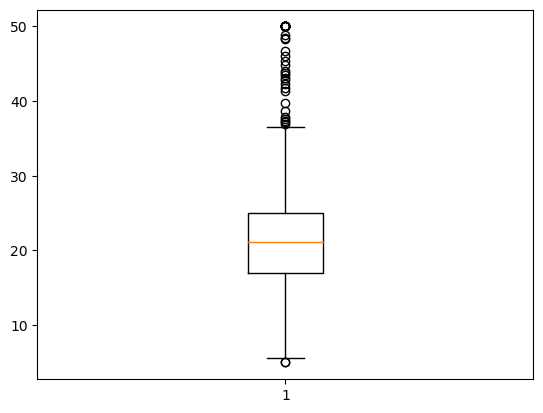

In [8]:
pyplot.boxplot(boston_df['MEDV'])

2. Provide a  bar plot for the Charles river variable

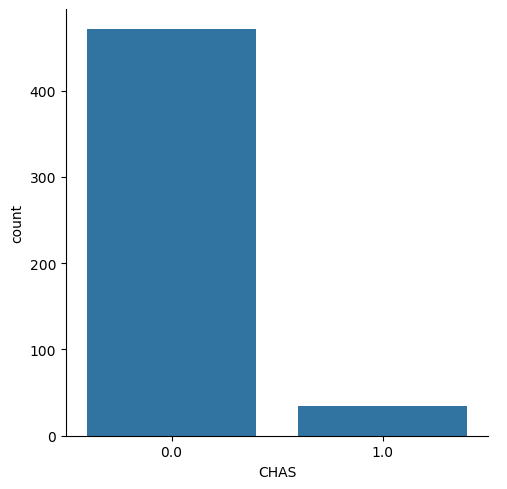

In [20]:
sns.catplot(x = boston_df['CHAS'], kind = 'count')

3.Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

{'whiskers': [<matplotlib.lines.Line2D at 0xed9c470>,
 'caps': [<matplotlib.lines.Line2D at 0xed9ffa8>,
 'boxes': [<matplotlib.lines.Line2D at 0xed9a890>,
 'medians': [<matplotlib.lines.Line2D at 0xeda3960>,
 'fliers': [<matplotlib.lines.Line2D at 0xeda58d0>,
 'means': []}

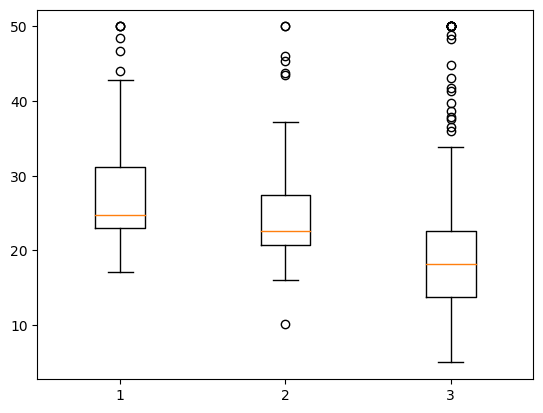

In [46]:
young = boston_df[boston_df['AGE'] < 35]
middle = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]
old = boston_df[(boston_df['AGE'] > 70)]

datasets = [young['MEDV'],middle['MEDV'],old['MEDV']]

pyplot.boxplot(datasets)

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

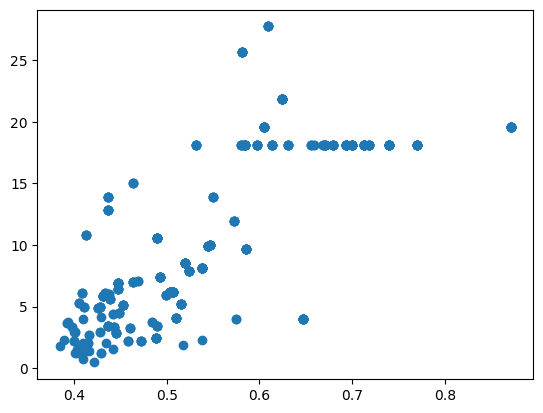

In [48]:
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'])

The relationship is somewhat postive.

5. Create a histogram for the pupil to teacher ratio variable

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

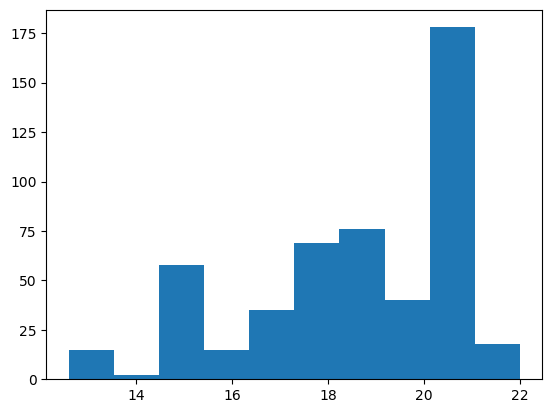

In [51]:
pyplot.hist(boston_df['PTRATIO'])

<h2>Task 3: Use the appropriate tests to answer the questions provided.</h2>

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [66]:
groupone = boston_df[boston_df['CHAS'] == 1]['MEDV']
groupzero = boston_df[boston_df['CHAS'] == 0]['MEDV']

tstatistic, pvalue = scipy.stats.ttest_ind(groupone, groupzero, equal_var = False)

print("t-statistic:", tstatistic)
print("p-value:", pvalue)

t-statistic: 3.113291312794837
p-value: 0.003567170098137517


Yes, the realationship between the columns is very significant.

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [74]:
#tstatistic, pvalue = scipy.stats.f_oneway(boston_df['CHAS'], boston_df['MEDV']
age_groups = []
for age in boston_df['AGE'].unique():
    age_groups.append(boston_df[boston_df['AGE'] == age]['MEDV'])



fstatistic, pvalue = scipy.stats.f_oneway(*age_groups)

print('fstatistic', fstatistic)
print('pvalue' , pvalue)

fstatistic 0.9840091646131573
pvalue 0.5539698276810093


No, the difference is statistically insignificant.

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [72]:
corr, pvalue = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
                                    
print('correlation', corr)
print('pvalue' , pvalue)  

correlation 0.7636514469209192
pvalue 7.913361061210442e-98


No, there is a clear and significant relationship.

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [78]:
scipy.stats.linregress(boston_df['DIS'], boston_df['MEDV'])

LinregressResult(slope=1.0916130158411097, intercept=18.390088330493384, rvalue=0.2499287340859039, pvalue=1.2066117273371223e-08, stderr=0.18837841478683107, intercept_stderr=0.8173887085024754)

The impact is 1.0916130158411097.